# Projeto 2 - Ciência dos dados

**Integrantes:**
</p>

- Amanda Carmo

</p>

- Vitor Miada

# <font color='#58878C'>Objetivo do projeto:</font>
<p>
Realizar análise de dados, voltada para variáveis de cunho qualitativo por meio de técnicas: regressão linear, decision tree e random forest regression.
<p>
A análise será feita colocando em foco corridas de fórmula 1, de modo a prever as primeiras posições dos corredores.


## Data-Set 

Foram encontradas várias bases de dados, importantes para o projeto contendo os dados de cada corrida. Cada um deles continha, separadamente, dados da escuderia, corredor, circuito, qualificação e os resultados.

Primeiramente, foi preparado o ambiente no jupyter, sob o qual se trataria os dados para a análise:

In [506]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

In [507]:
dados_driver = pd.read_csv('drivers.csv')
dados_quali = pd.read_csv('quali.csv')
dados_result = pd.read_csv('results.csv')
dados_circuit = pd.read_csv('a.csv')
dados_race = pd.read_csv('b.csv')
dados_contresult = pd.read_csv('contresu.csv')
dados_escud = pd.read_csv('cont.csv')

____
### Limpando os dados

O primeiro passo a ser feito é o tratamento dos datasets com o objetivo de se ter uma leitura mais limpa, focando-se naquilo que será analisado.

- dados do corredor:

In [508]:
dados_driver = dados_driver.drop(dados_driver.columns[[3, 4, 5, 6, 8]], axis=1) 

In [509]:
dados_driver.head()

,driverId,driverRef,number,nationality
0,1,hamilton,44,British
1,2,heidfeld,\N,German
2,3,rosberg,6,German
3,4,alonso,14,Spanish
4,5,kovalainen,\N,Finnish


.

- dados da qualificação:

In [510]:
dados_quali = dados_quali.drop(dados_quali.columns[[6, 7, 8]], axis=1) 

In [511]:
dados_quali.head()

,qualifyId,raceId,driverId,constructorId,number,position
0,1,18,1,1,22,1
1,2,18,9,2,4,2
2,3,18,5,1,23,3
3,4,18,13,6,2,4
4,5,18,2,2,3,5


.

- dados da escuderia:

In [512]:
dados_escud = dados_escud.drop(dados_escud.columns[[1, 4]], axis=1) 
dados_escud.head()

,constructorId,name,nationality
0,1,McLaren,British
1,2,BMW Sauber,German
2,3,Williams,British
3,4,Renault,French
4,5,Toro Rosso,Italian


.

- dados da corrida:

In [513]:
dados_race = dados_race.drop(dados_race.columns[[2, 5, 6, 7]], axis=1) 

In [514]:
dados_race.head()

,raceId,year,circuitId,name
0,1,2009,1,Australian Grand Prix
1,2,2009,2,Malaysian Grand Prix
2,3,2009,17,Chinese Grand Prix
3,4,2009,3,Bahrain Grand Prix
4,5,2009,4,Spanish Grand Prix


.

- dados do circuito:

In [515]:
dados_circuit = dados_circuit.drop(dados_circuit.columns[[1, 3, 5, 6, 7, 8]], axis=1) 

In [516]:
dados_circuit.head()

,circuitId,name,country
0,1,Albert Park Grand Prix Circuit,Australia
1,2,Sepang International Circuit,Malaysia
2,3,Bahrain International Circuit,Bahrain
3,4,Circuit de Barcelona-Catalunya,Spain
4,5,Istanbul Park,Turkey


.

- Resultados

Escuderia:

In [517]:
dados_contresult =  dados_contresult.drop(dados_contresult.columns[[5]], axis=1).sort_values(by=['raceId'])

In [518]:
dados_contresult.head()

,constructorStandingsId,raceId,constructorId,points,position,wins
3666,4046,1,6,0.0,9,0
3667,4044,1,2,0.0,7,0
3668,4045,1,9,0.0,8,0
3669,4043,1,10,0.0,6,0
3670,4042,1,5,3.0,5,0


Geral:

In [519]:
pontos = dados_contresult.drop(columns = ['constructorStandingsId', 'position', 'constructorId'])

In [520]:
pontos.head()

,raceId,points,wins
3666,1,0.0,0
3667,1,0.0,0
3668,1,0.0,0
3669,1,0.0,0
3670,1,3.0,0


In [521]:
dados_result =  dados_result.drop(dados_result.columns[[5, 7, 9, 10,11,12,13,15,16,17]], axis=1) 

In [522]:
dados_result.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank
0,1,18,1,1,22,1,1,2
1,2,18,2,2,3,2,2,3
2,3,18,3,3,7,3,3,5
3,4,18,4,4,5,4,4,7
4,5,18,5,1,23,5,5,1


In [523]:
dados_results = dados_result.sort_values(by=['raceId'])

In [524]:
dados_results.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank
7572,7573,1,1,1,1,\N,20,13
7571,7572,1,5,1,2,\N,19,\N
7570,7571,1,6,3,17,\N,18,18
7569,7570,1,12,4,8,\N,17,19
7568,7569,1,13,6,3,\N,16,15


In [525]:
resultsi = dados_results.merge(dados_race, on = 'raceId', how = 'left')

In [526]:
resultsi.head(30).head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,year,circuitId,name
0,7573,1,1,1,1,\N,20,13,2009,1,Australian Grand Prix
1,7572,1,5,1,2,\N,19,\N,2009,1,Australian Grand Prix
2,7571,1,6,3,17,\N,18,18,2009,1,Australian Grand Prix
3,7570,1,12,4,8,\N,17,19,2009,1,Australian Grand Prix
4,7569,1,13,6,3,\N,16,15,2009,1,Australian Grand Prix


In [527]:
results = resultsi.drop(resultsi.columns[[8,10]], axis=1)

In [528]:
results.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
0,7573,1,1,1,1,\N,20,13,1
1,7572,1,5,1,2,\N,19,\N,1
2,7571,1,6,3,17,\N,18,18,1
3,7570,1,12,4,8,\N,17,19,1
4,7569,1,13,6,3,\N,16,15,1


In [529]:
F_result = results.merge(pontos, on = 'raceId', how = 'left')

In [530]:
F_result.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId,points,wins
0,7573,1,1,1,1,\N,20,13,1,0.0,0.0
1,7573,1,1,1,1,\N,20,13,1,0.0,0.0
2,7573,1,1,1,1,\N,20,13,1,0.0,0.0
3,7573,1,1,1,1,\N,20,13,1,0.0,0.0
4,7573,1,1,1,1,\N,20,13,1,3.0,0.0


___

#### De modo a deixar a base de dados mais limpa, serão consideradas as sete primeiras posições de chagada. Desta forma, trata-se o data frame principal, denominado **dados**:

In [531]:
dados = F_result[F_result['positionOrder'].map(int) < 6]

In [532]:
dados.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId,points,wins
90,7554,1,18,23,22,1,1,3,1,0.0,0.0
91,7554,1,18,23,22,1,1,3,1,0.0,0.0
92,7554,1,18,23,22,1,1,3,1,0.0,0.0
93,7554,1,18,23,22,1,1,3,1,0.0,0.0
94,7554,1,18,23,22,1,1,3,1,3.0,0.0


___

### ANALISE EXPLORATORIA


A priori, foram realizadas análises que colocavam em questão as taxas de vitória. Primeiramente, da escuderia, depois de cada competidor, individualmente. Essa análise foi feita inicialmente para as três primeiras posições.

A priemira plotagem feita foi de modo a analisar a taxa de vitórias de cada escuderia:

In [550]:
#taxa de vitoria da escuderia 
dados_taxa = pd.crosstab(dados['constructorId'],dados['positionOrder'], normalize = "index" )
dados_taxa.head()


positionOrder,1,2,3,4,5
constructorId,,,,,
1,0.275771,0.226652,0.200000,0.158150,0.139427
2,0.023707,0.221983,0.144397,0.329741,0.280172
3,0.243264,0.238183,0.176443,0.161047,0.181062
4,0.204360,0.203451,0.172570,0.212080,0.207539
5,0.087302,0.079365,0.079365,0.492063,0.261905


In [551]:
dados_taxa_filtrado = dados_taxa.sort_values(by=1).tail(11)
dados_taxa_filtrado.head()

positionOrder,1,2,3,4,5
constructorId,,,,,
3,0.243264,0.238183,0.176443,0.161047,0.181062
114,0.250000,0.250000,0.250000,0.250000,0.000000
1,0.275771,0.226652,0.200000,0.158150,0.139427
180,0.318359,0.199219,0.148438,0.173828,0.160156
131,0.358242,0.255678,0.133333,0.115751,0.136996


In [552]:
dados_taxa_filtrado1 = dados_taxa_filtrado.loc[:,[1]].head(11)

Text(0, 0.5, 'Maiores Frequências de Vitórias (em %)')

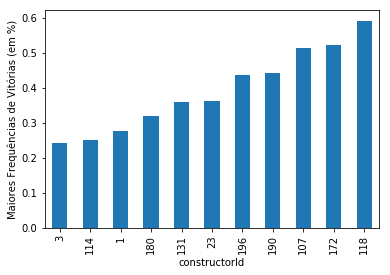

In [553]:
dados_taxa_filtrado1.plot(kind='bar', legend=False)
plt.ylabel("Maiores Frequências de Vitórias (em %)")

Por meio do gráfico apresentado, vê-se que a escuderia de Id 118 possuiu maior quantiade de vitórias.

A seguir, será realizada a análise da taxa de vitória de cada corredor, individualmente:

In [554]:
#taxa de vitoria de cada corredor
dados[["driverId", "positionOrder"]].head()

,driverId,positionOrder
90,18,1
91,18,1
92,18,1
93,18,1
94,18,1


In [555]:
corredor_taxa = pd.crosstab(dados['driverId'],dados['positionOrder'], normalize = "index" )

In [557]:
corredor_taxa.head()

positionOrder,1,2,3,4,5
driverId,,,,,
1,0.434462,0.204713,0.148748,0.108002,0.104075
2,0.000000,0.233728,0.159763,0.322485,0.284024
3,0.272228,0.294182,0.104281,0.130626,0.198683
4,0.219787,0.259236,0.192862,0.172824,0.155291
5,0.070064,0.140127,0.070064,0.273885,0.445860


In [558]:
corredor_taxa_filtrado = corredor_taxa.sort_values(by=1).tail(11)
corredor_taxa_filtrado.head()

positionOrder,1,2,3,4,5
driverId,,,,,
526,0.500000,0.000000,0.000000,0.500000,0.000000
219,0.627451,0.000000,0.000000,0.372549,0.000000
647,0.650000,0.200000,0.000000,0.100000,0.050000
475,0.651613,0.154839,0.058065,0.122581,0.012903
373,0.680147,0.025735,0.143382,0.084559,0.066176


In [559]:
corredor_taxa_filtrado1 = corredor_taxa_filtrado.loc[:,[1]].head(11)

In [560]:
corredor_taxa_filtrado1

positionOrder,1
driverId,
526,0.500000
219,0.627451
647,0.650000
475,0.651613
373,0.680147
525,0.818182
766,1.000000
657,1.000000
320,1.000000


Text(0, 0.5, 'Maiores Frequência de Vitórias (em %)')

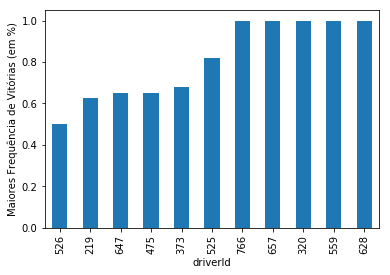

In [561]:
corredor_taxa_filtrado1.plot(kind='bar', legend=False)
plt.ylabel("Maiores Frequência de Vitórias (em %)")

___

## Técnicas de análise: variáveis qualitativas

## Random forest

Esta técnica utilizada pelo grupo se baseia, como sugerido pelo seu nome, em um conjunto de árvores de decisões, assim, com várias ramificações, possibilidades. Cada uma dessas árvores trabalha de forma individual de modo a gerar uma possível predição. O resultado obtido no classificador será validado conforme a predição predominante entre as árvores.

A primeira coisa feita foi separar, com base no dataframe, chamado "dados", separá-lo a fim de se ter uma parte para o treino e uma para os testes.

In [255]:
dados.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
13,7556,1,15,7,9,3,3,10,1
20,7574,2,18,23,22,1,1,1,2
31,7575,2,2,2,6,2,2,10,2


In [256]:
msk = np.random.rand(len(dados)) < 0.8

In [257]:
train = dados[msk]

In [258]:
train.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
10,7554,1,18,23,22,1,1,3,1
12,7555,1,22,23,23,2,2,14,1
13,7556,1,15,7,9,3,3,10,1
20,7574,2,18,23,22,1,1,1,2
31,7575,2,2,2,6,2,2,10,2


In [259]:
test = dados[~msk]
test.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
54,7594,3,20,9,15,1,1,2,17
100,7655,6,22,23,23,2,2,7,6
111,7656,6,8,6,4,3,3,5,6
168,7714,9,17,9,14,1,1,3,20
190,7734,10,1,1,1,1,1,4,11


In [260]:
y_train = train['positionOrder']
x_train = train.drop(columns = ['positionOrder', 'position'])

In [261]:
y_test = test['positionOrder']
x_test = test.drop(columns=['positionOrder', 'position'])

In [262]:
y_test.dtype

dtype('int64')

In [263]:
y_train.dtype

dtype('int64')

In [264]:
#plt.scatter(x_test.points, y_test)

In [265]:
x_test.head()

,resultId,raceId,driverId,constructorId,number,rank,circuitId
54,7594,3,20,9,15,2,17
100,7655,6,22,23,23,7,6
111,7656,6,8,6,4,5,6
168,7714,9,17,9,14,3,20
190,7734,10,1,1,1,4,11


In [266]:
#x_train.points.corr(y_train)

In [267]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

O encoder usado acima possibilita conversão de variáveis categóricas em qualitativas. A partir disso, implementa-se o modelo Random Forest

In [268]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0,n_jobs = -1)
model.fit(x_train_encoded, y_train) #treina o modelo

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [269]:
model.score(x_train_encoded,y_train) # taxa de acertos do treinamento (esperado dar 1)

1.0

#### realização dos testes:

A priori, testa-se a **acurácia** do modelo, depois, ele é **testado**

In [270]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

In [271]:
y_predict = model.predict(x_test_encoded)

In [272]:
acc_RandomForestClassifier= model.score(x_test_encoded, y_test)

In [273]:
acc_RandomForestClassifier

0.43729903536977494

## Matriz de Confusão

Com esta matriz podemos concluir os erros do nosso classificador. Pode-se perceber que o classificador está operando corretamente, pois mesmo com uma porcentagem "baixa", os valores próximos ao esperado estão mais altos que os não esperados.

In [274]:
matriz = confusion_matrix(y_test, y_predict)
matriz

array([[107,  40,  43],
       [ 73,  53,  83],
       [ 44,  67, 112]], dtype=int64)

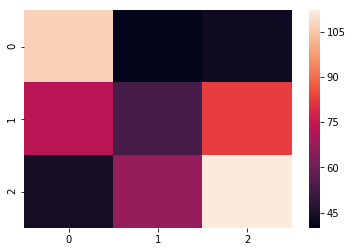

In [275]:
sns.heatmap(matriz)

Substituindo predições no dataset de teste:

In [276]:
test['PositionPredict'] = y_predict

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [277]:
y_predict_proba = model.predict_proba(x_test_encoded)

In [278]:
y_predict_proba

array([[0.29, 0.26, 0.45],
       [0.13, 0.4 , 0.47],
       [0.12, 0.32, 0.56],
       ...,
       [0.58, 0.23, 0.19],
       [0.07, 0.57, 0.36],
       [0.27, 0.3 , 0.43]])

In [279]:
test['bPredictProba'] = y_predict_proba[:,1]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [280]:
resultados = test.sort_values(by='bPredictProba')[['driverId', 'constructorId', 'raceId', 'circuitId', 'positionOrder', 'PositionPredict']].head(20)


In [281]:
resultados.sort_values(by = 'PositionPredict').head()

,driverId,constructorId,raceId,circuitId,positionOrder,PositionPredict
17346,373,172,694,39,3,1
6335,102,1,289,30,3,1
7615,123,3,328,9,2,1
22771,1,131,938,14,1,1
2639,30,6,128,4,1,1


## Logistic Regression

In [282]:
msk2 = np.random.rand(len(dados)) < 0.8

In [283]:
train2 = dados[msk2]

In [284]:
test2 = dados[~msk2]

In [285]:
y_train2 = train2['positionOrder']
x_train2 = train2.drop(columns=['positionOrder', 'position','resultId'])

In [286]:
y_test2 = test2['positionOrder']
x_test2 = test2.drop(columns=['positionOrder', 'position','resultId'])

In [287]:
encoder2 = OneHotEncoder(handle_unknown='ignore')
x_train2_encoded = encoder.fit_transform(x_train2.astype(str).values)

In [288]:
model2 = LogisticRegression(solver='lbfgs', multi_class='auto')

In [289]:
model2.fit(x_train2_encoded, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [290]:
x_test2_encoded = encoder.transform(x_test2.astype(str).values)

In [291]:
y_pred2 = model2.predict(x_test2_encoded)

In [292]:
acc = accuracy_score(y_test2, y_pred2)

In [293]:
acc

0.268370607028754

In [294]:
matriz2 = confusion_matrix(y_test2, y_pred2)
matriz2

array([[ 80,  88,  39],
       [ 79,  24, 107],
       [ 52,  93,  64]], dtype=int64)

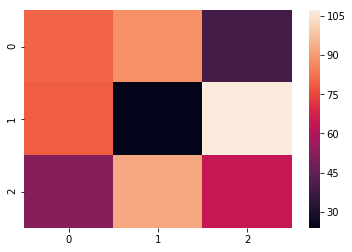

In [295]:
sns.heatmap(matriz2)

## Decision Tree


In [296]:
msk3 = np.random.rand(len(dados)) < 0.8

In [297]:
train3 = dados[msk3]

In [298]:
test3 = dados[~msk3]

In [299]:
y_train3 = train3['positionOrder']
x_train3 = train3.drop(columns=['positionOrder', 'position','resultId'])

In [300]:
encoder3 = OneHotEncoder(handle_unknown='ignore')
x_train3_encoded = encoder.fit_transform(x_train3.astype(str).values)

In [301]:
x_train_encoded

<2454x3871 sparse matrix of type '<class 'numpy.float64'>'
	with 17178 stored elements in Compressed Sparse Row format>

In [302]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train3_encoded, y_train3)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [303]:
y_test3 = test3['positionOrder']
x_test3 = test3.drop(columns=['positionOrder', 'position','resultId'])

In [304]:
x_test3_encoded = encoder.transform(x_test3.astype(str).values)

In [305]:
y_pred3 = regressor.predict(x_test3_encoded)

In [306]:
acc3 = accuracy_score(y_test3, y_pred3)

In [307]:
acc3

0.4138486312399356

In [308]:
matriz3 = confusion_matrix(y_test3, y_pred3)
matriz3

array([[ 93,  50,  33],
       [ 70,  60,  78],
       [ 63,  70, 104]], dtype=int64)

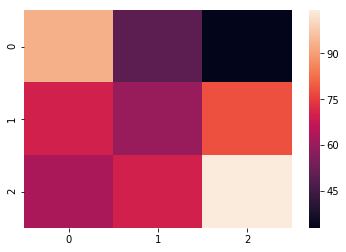

In [309]:
sns.heatmap(matriz3)